# **Network Optimization: Distribution of COVID-19 Vaccines**




<div class="column">
    <img src="https://antiguaobserver.com/wp-content/uploads/2020/04/Vaccine-coronavirus.jpg" width=400"  alt="drawing>
  </div>
  <div class="column">
    <img src="http://www.businessstudynotes.com/wp-content/uploads/2017/05/How-to-Manage-a-Distribution-Network.jpg" width=460>
  </div>
  
</div> 




In the recent weeks, biopharmaceutical companies, Pfizer and Moderna, have each [announced promising trial results](https://www.latimes.com/california/story/2020-11-17/moderna-pfizer-coronavirus-vaccines-explained) for COVID-19 vaccinations which experts hope will soon put an end to the pandemic. 

Assuming all of the scientific, bureaucratic, and manufacturing hurdles are cleared, the world will be faced with the monumental task of distributing millions of vaccines across the globe, **meeting demand** as quickly as possible while **minimizing logistics costs.** 

In Connecticut, [officials have been scrambling](https://www.courant.com/coronavirus/hc-news-coronavirus-vaccine-advisory-group-update-20201120-37mtm4dgpbaxlhyqg4asdxgmam-story.html) to develop a distribution plan, faced with a wide variety of undetermined variables. 



# **Problem Statement**

**Develop an optimization model that minimizes logistics cost, while covering demand for COVID-19 vaccinations for 10 towns in Windham County, Connecticut**

Although the variables in our model will not be as comprehensive as those faced by federal, state, and local officials, our aim is to illuminate some of the key sticking points of COVID-19 vaccination distribution and to highlight some of the consequences inherent to the uncertainty of vaccine distribution.  

# **Import Statements**

**To conduct our analysis, we will require quite a few Python packages. We begin by importing them now**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import modules

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))

from pyomo.environ import *
# ensure you have cbc installed
!apt-get install -y -qq coinor-cbc

     |████████████████████████████████| 9.4MB 10.0MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 256kB 57.1MB/s 
     |████████████████████████████████| 163kB 43.9MB/s 
Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking co

In [ ]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 14 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 

In [ ]:
#Libgeos - Basemap
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (1,109 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144999 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-

In [ ]:
#Additional Imports
from mpl_toolkits.basemap import Basemap
from pylab import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import requests
import re
import seaborn as sns
from sklearn.metrics.pairwise import haversine_distances
from statistics import stdev
from math import radians
import networkx as nx
import pprint
%matplotlib inline
 

# **Data Preparation**

To build our model, we will require geographic information about each of our towns. We begin by importing data that contains the longitude and latitude of the center point of each town. 

## **Town Centroids**

In [ ]:
# Create DataFrame of Geographic Data, Set Town as Index
centroids = pd.read_csv('/content/drive/MyDrive/Project 3/townCentroids.csv', index_col='TOWN')

#Display
centroids.head()

,X,Y,TOWN_NO,TOTAL_SQMI,LAND_SQMI,WATER_SQMI,COUNTY,PLAN_ORG,DEP_DIST,COAST_AREA
TOWN,,,,,,,,,,
Salisbury,-73.425651,41.986019,122,60.5,57.6,2.9,Litchfield,Northwestern Conn,DEP Western District,NaN
North Canaan,-73.293569,42.022264,100,19.6,19.6,0.0,Litchfield,Northwestern Conn,DEP Western District,NaN
Norfolk,-73.196224,41.980145,98,46.7,45.6,1.1,Litchfield,Litchfield Hills,DEP Western District,NaN
Colebrook,-73.080811,42.001546,29,33.0,32.8,0.2,Litchfield,Litchfield Hills,DEP Western District,NaN
Hartland,-72.948897,42.004293,65,34.5,33.0,1.5,Hartford,Litchfield Hills,DEP Western District,NaN


* From the displayed output, we observe that in addition to longitude and latitude, our data includes `town id`, `land area`, and a column for which `county` the town is in, all information which may be useful later on. 

* There are a few columns which we will not need for our analysis, lets remove those immediately, and clean up the column names in the process. 

In [ ]:
#Remove Unncessary Columns
centroids = centroids[['X', 'Y', 'TOWN_NO', 'TOTAL_SQMI','COUNTY']]

#Adjust Column Names To Our Liking
centroids.rename(columns={'X': 'Longitude', 'Y':'Latitude', 
                          'TOTAL_SQMI':'Square_Miles', 'COUNTY': 'County',
                          'TOWN_NO': 'Town_number'}, inplace=True)

#Display
centroids.tail()

,Longitude,Latitude,Town_number,Square_Miles,County
TOWN,,,,,
Westport,-73.346495,41.145319,158,22.4,Fairfield
Stamford,-73.559037,41.105028,135,38.5,Fairfield
Norwalk,-73.422614,41.118148,103,27.7,Fairfield
Greenwich,-73.638467,41.069082,57,50.6,Fairfield
Darien,-73.482355,41.081146,35,13.7,Fairfield


**Much more streamlined!**

In addition to geography, it might be useful to know something about the demographics of each of our towns. The latest census information we have available is 2010. However using this [source](http://data.ctdata.org/visualization/census-annual-population-estimates-by-town) we can achieve a better guess at current population numbers (2018 estimates).  

## **Demographics**

In [ ]:
#Create DataFrame of Populations, Set Index Column As Town
population = pd.read_csv('/content/drive/MyDrive/Project 3/census-population-by-town-2018.csv', index_col='Town')

# Use 2018 Estimates Only
population = population[population['Year'] == 2018]

#Rename Columns
population = population.rename(columns={'Value':'Population_estimate'})

#Remove Unecessary Columns
population = population['Population_estimate']

#Display
population.head()

Town
Andover         3231
Ansonia        18721
Ashford         4261
Avon           18302
Barkhamsted     3624
Name: Population_estimate, dtype: int64

**Fantastic, now we have a good estimate for how many people live in each of our towns. Let's merge this data with our geographic info!**

In [ ]:
#Merge Geographic and Demographic DataFrame
merged_df = centroids.merge(population, how='left', left_index=True, right_index=True)

#Display Merged DataFrame
merged_df.head()

,Longitude,Latitude,Town_number,Square_Miles,County,Population_estimate
TOWN,,,,,,
Salisbury,-73.425651,41.986019,122,60.5,Litchfield,3598
North Canaan,-73.293569,42.022264,100,19.6,Litchfield,3254
Norfolk,-73.196224,41.980145,98,46.7,Litchfield,1640
Colebrook,-73.080811,42.001546,29,33.0,Litchfield,1405
Hartland,-72.948897,42.004293,65,34.5,Hartford,2120


Let's make sure there isn't any data loss. 

In [ ]:
#Display Shape of Merged DatFrame
print('There are 169 towns in the State of Connecticut and', merged_df.shape[0], 'towns in our merged DataFrame')

#Are There Any Null Values In Our Merged DataFrame?
print('\nThere are', merged_df.isnull().sum().sum(), 'null values in our merged DataFrame')

There are 169 towns in the State of Connecticut and 169 towns in our merged DataFrame

There are 0 null values in our merged DataFrame


* **Same number of rows as the number of towns in Connecticut and No Nulls. Successful Merge!**


## **COVID-19 Data**

Finally, our model will require some information about the **COVID-19** virus. Using this [source](https://data.ct.gov/Health-and-Human-Services/COVID-19-Tests-Cases-and-Deaths-By-Town-/28fr-iqnx) we can import time-series data for each town since the onset of the virus.

In [ ]:
#Create DataFrame of Time Series Covid Statistics
ct_covid_data = pd.read_csv('/content/drive/MyDrive/Project 3/COVID-19_Tests__Cases__and_Deaths__By_Town_1.csv', index_col='Town')

#Display
ct_covid_data.tail()

,Last update date,Town number,Total cases,Confirmed cases,Probable cases,Case rate,Total deaths,Confirmed deaths,Probable deaths,People tested,Rate tested per 100k,Number of tests,Number of positives,Number of negatives,Number of indeterminates
Town,,,,,,,,,,,,,,,
Windsor Locks,12/03/2020,165,316,303.0,13.0,2454.0,24,22.0,2.0,4195.0,32580.0,8856.0,380.0,8464.0,12.0
Wolcott,12/03/2020,166,652,609.0,43.0,3916.0,14,10.0,4.0,6297.0,37822.0,15283.0,803.0,14438.0,42.0
Woodbridge,12/03/2020,167,254,226.0,28.0,2885.0,36,31.0,5.0,3797.0,43123.0,8194.0,349.0,7829.0,16.0
Woodbury,12/03/2020,168,207,194.0,13.0,2170.0,3,3.0,0.0,3479.0,36479.0,7382.0,229.0,7128.0,25.0
Woodstock,12/03/2020,169,100,98.0,2.0,1272.0,0,0.0,0.0,2511.0,31938.0,4500.0,107.0,4388.0,5.0


**This dataset is rich with information ready to analyze. Our model will consider only a limited subset. Day 0 will be October 28, 2020. Specifically, we will look  at `Total cases` which includes both `Confirmed` and `Probable` Cases of Covid for each of our towns. Let's make these changes to the DataFrame**  

In [ ]:
#Clean Column Names
ct_covid_data = ct_covid_data.rename(columns={'Last update date':'Date', 'Total cases ':'Total_cases', 'Total deaths':'Total_deaths'})

#Change The Date Column DataType To a DateTime Dtype:
ct_covid_data['Date'] = pd.to_datetime(ct_covid_data['Date'])

#Subset Based On Day0 - October, 28 2020
day0 = ct_covid_data[ct_covid_data['Date'] == '2020-10-28']

#Subset With Columns of Interest to Our Analysis (Total Deaths and Total Cases)
day0 = day0[['Total_cases', 'Total_deaths']]

#Dispaly
day0.head(10)


,Total_cases,Total_deaths
Town,,
Andover,16,0
Ansonia,396,8
Ashford,31,1
Avon,285,46
Barkhamsted,36,0
Beacon Falls,79,0
Berlin,274,17
Bethany,69,1
Bethel,392,31


**Now we have COVID data for each of our towns on October, 28th. Let's merge again to achieve to marry all columns for our finalized DataFrame**

In [ ]:
#Create Final DataFrame, Merge Covid Stats with Merged Geographic and Demographic Info
df = merged_df.merge(day0, how='left', left_index=True, right_index=True)

#Display!
df.head(10)

,Longitude,Latitude,Town_number,Square_Miles,County,Population_estimate,Total_cases,Total_deaths
TOWN,,,,,,,,
Salisbury,-73.425651,41.986019,122,60.5,Litchfield,3598,29,0
North Canaan,-73.293569,42.022264,100,19.6,Litchfield,3254,51,1
Norfolk,-73.196224,41.980145,98,46.7,Litchfield,1640,18,0
Colebrook,-73.080811,42.001546,29,33.0,Litchfield,1405,7,0
Hartland,-72.948897,42.004293,65,34.5,Hartford,2120,7,0
Granby,-72.834852,41.969545,56,41.3,Hartford,11375,52,0
Suffield,-72.678851,41.994486,139,43.1,Hartford,15743,238,20
Enfield,-72.554719,41.983979,49,33.8,Hartford,44466,830,23
Somers,-72.453051,41.994879,129,28.7,Tolland,10834,347,5


**All of our columns are in place! Let's Double-Check to make sure everything looks correct**

In [ ]:
#Display Shape of Final DatFrame
print('There are 169 towns in the State of Connecticut and', df.shape[0], 'towns in our final DataFrame')

#Are There Any Null Values In Our Final DataFrame?
print('\nThere are', df.isnull().sum().sum(), 'null values in our final DataFrame')

There are 169 towns in the State of Connecticut and 169 towns in our final DataFrame

There are 0 null values in our final DataFrame


## **Calculating New Variables**

**As a final step, let's create two new columns. `Deaths Per 100K` and `Cases Per 100K`. This will be easy with the demographic information we imported.**

In [ ]:
#Create New Column Of Cases Per 100K, Population
df['Cases_per_100K'] = df['Total_cases']/(df['Population_estimate']/100000)

#Create New Column Of Deaths Per 100K, Population
df['Deaths_per_100K'] = df['Total_deaths']/(df['Population_estimate']/100000)

#Display Summary Statistics
df.describe()

,Longitude,Latitude,Town_number,Square_Miles,Population_estimate,Total_cases,Total_deaths,Cases_per_100K,Deaths_per_100K
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,-72.741888,41.593013,85.000000,29.634320,21193.355030,415.923077,27.272189,1321.773714,86.196365
std,0.481104,0.242356,48.930222,13.002299,25541.700142,787.178816,43.193052,734.672184,100.446420
min,-73.638467,41.069082,1.000000,5.300000,840.000000,0.000000,0.000000,0.000000,0.000000
25%,-73.128076,41.381026,43.000000,19.600000,5385.000000,43.000000,1.000000,774.764804,10.643960
50%,-72.776748,41.601447,85.000000,28.000000,12854.000000,142.000000,5.000000,1135.020099,45.365190
75%,-72.364935,41.784183,127.000000,38.300000,25817.000000,396.000000,34.000000,1641.571995,142.831637
max,-71.818487,42.022264,169.000000,64.400000,144900.000000,4934.000000,204.000000,4181.517762,466.617027


**Let's dive in and explore our data!**

# **Exploratory Data Analysis**




## **Windham County in Context**

To conduct our analysis, we will focus on just one county within Connecticut, namely Windham County. 



<div>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/Windham_County_in_Connecticut.svg/1208px-Windham_County_in_Connecticut.svg.png" width=350">
</div>

* Windham County is the [least populous](https://en.wikipedia.org/wiki/Windham_County,_Connecticut) county in Connecticut. 
* It is located in the northeastern corner of the state, sharing borders with both Massachusetts and Rhode Island. 

**Using the prepared data, let's subset our `DataFrame` to include information for only Windham County**


In [ ]:
# Subset Covid Data For Just Windham County
windham = df[df['County'] == 'Windham']

#Display
windham

,Longitude,Latitude,Town_number,Square_Miles,County,Population_estimate,Total_cases,Total_deaths,Cases_per_100K,Deaths_per_100K
TOWN,,,,,,,,,,
Woodstock,-72.022132,41.969433,169,61.6,Windham,7862,50,0,635.970491,0.000000
Thompson,-71.873588,41.979734,141,48.7,Windham,9395,65,2,691.857371,21.287919
Eastford,-72.091977,41.891587,39,28.6,Windham,1790,15,1,837.988827,55.865922
Ashford,-72.170986,41.891116,3,40.3,Windham,4261,31,1,727.528749,23.468669
Putnam,-71.871199,41.909319,116,20.1,Windham,9395,64,1,681.213411,10.643960
Pomfret,-71.983430,41.867044,112,40.6,Windham,4204,30,0,713.606089,0.000000
Killingly,-71.849966,41.831026,69,50.0,Windham,17287,127,0,734.656100,0.000000
Chaplin,-72.127731,41.793050,24,19.8,Windham,2256,15,0,664.893617,0.000000
Hampton,-72.058306,41.784183,63,25.3,Windham,1853,12,0,647.598489,0.000000


In [ ]:
#Display Some information About Windham County:
print('Windham County is approximately', windham['Square_Miles'].sum(), 'square miles')
print('\nBased on best estimates, about', windham['Population_estimate'].sum(), 'people live in Windham County')
print('\nThere are', windham.shape[0], 'towns in Windham. Of which we will choose 10 for our analysis')

#Sum Case and Death Columns To Display Some Information About Covid
print('\nBy October 28, 2020 Windham County had experienced', windham['Total_cases'].sum(), 'cases and', windham['Total_deaths'].sum(), 'deaths from COVID-19')

Windham County is approximately 519.9 square miles

Based on best estimates, about 117027 people live in Windham County

There are 15 towns in Windham. Of which we will choose 10 for our analysis

By October 28, 2020 Windham County had experienced 1445 cases and 19 deaths from COVID-19


**Let's see how Windham compares to the rest of the state of Connecticut. Using our dataframe for all CT towns, let's make a scatterplot**

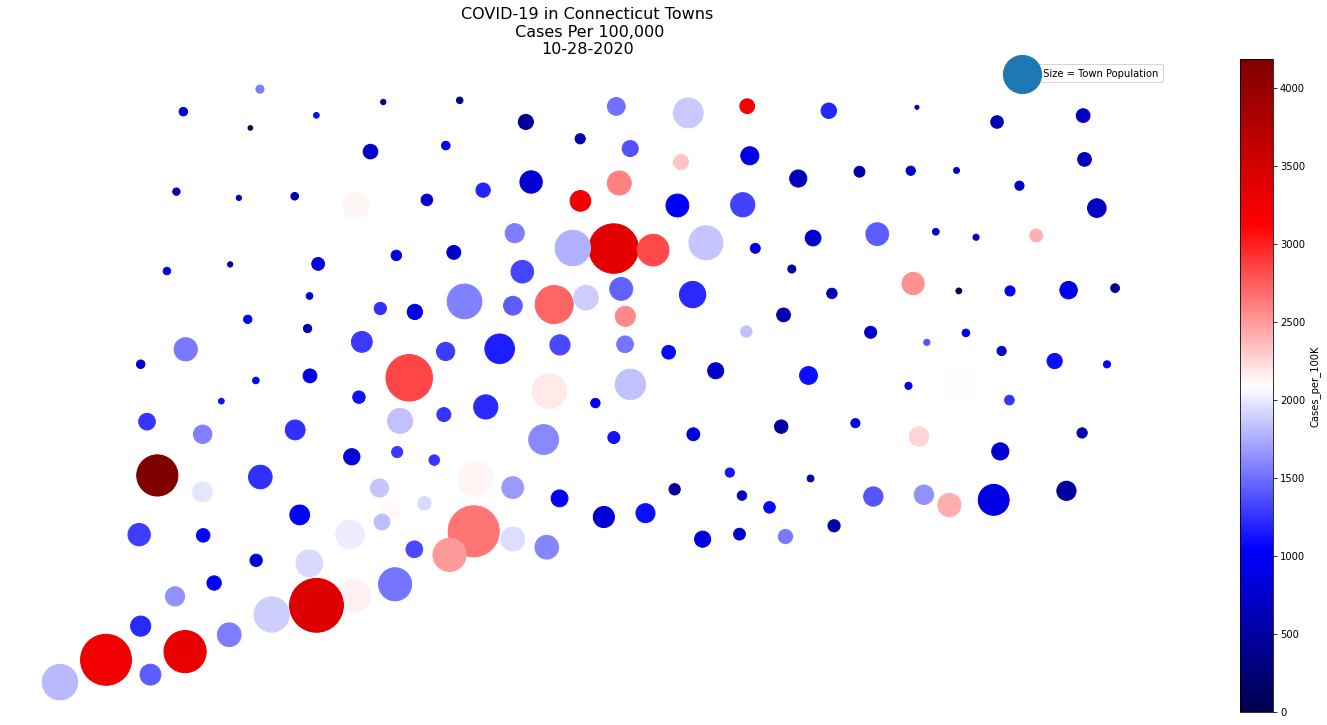

In [ ]:
sns.reset_orig()
#ScatterPlot of Lat/Long - Size of Dots Determined By Population - Color Determined By Covid Per 100K. 
df.plot(kind='scatter', x='Longitude', y='Latitude',
              figsize=(26,12), fontsize=14, marker='o',
              s=df['Population_estimate']/50, label=' Size = Town Population', 
              c='Cases_per_100K', 
              cmap=plt.get_cmap('seismic')
               )
#Turn Off Axis
plt.axis('off')

#Add Title and Display
plt.title('COVID-19 in Connecticut Towns\n Cases Per 100,000\n10-28-2020',fontsize=16)
plt.show()

Each dot in the graph represents a town in Connecticut. The size of the circles are proportional to the population size of the town. The color indicates number of COVID cases. Blue indicating less, Red indicating more. 

From the output we can see that the northeastern part of the state, that corresponds to Windham County, does in fact consist of less populated towns. In addition, juxtaposed with more heavily influenced regions like Hartford and the Southwestern part of the state, Windham has experienced relatively less cases of COVID per population size. 



**Let's verify this information in code**

In [ ]:
#Sum of Covid Cases and Deaths In Each CT County - Sort From Most To Least Cases
df.groupby('County')[['Total_cases', 'Total_deaths']].sum().sort_values('Total_cases', ascending=False)

,Total_cases,Total_deaths
County,,
Fairfield,23895,1435
Hartford,17995,1479
New Haven,17156,1128
New London,3765,140
Litchfield,2279,143
Middlesex,1992,197
Tolland,1764,68
Windham,1445,19


* Indeed, Windham has experienced both the fewest number of cases and the fewest number of deaths of any county in Connecticut. 



In [ ]:
#GroupBy Sum Of Cases Per County - Divide By Population Per County And Sort From Most Affected To Least Affected
(df.groupby('County')['Total_cases'].sum()/df.groupby('County')['Population_estimate'].sum()).sort_values(ascending=False)

County
Fairfield     0.025317
Hartford      0.020158
New Haven     0.020004
New London    0.013651
Litchfield    0.012583
Windham       0.012348
Middlesex     0.012245
Tolland       0.011688
dtype: float64

* However, Windham is the least populous county. The chart above shows, when viewed as a percentage of the population, Windham is actually the 3rd least affected county in Connecticut. 

## **Providing Aid To the Ten Most Affected Towns**

We wanted to ensure that the **10 towns most affected by COVID-19 as a percentage of the population** were receiving vaccines to deal with the pandemic.

Of the 15 towns in Windham, one town, Scotland, has not had a single case of COVID, as of October, 28th. 

Let's sort all the towns by `cases per 100K` to determine which towns are most in need of aid. 

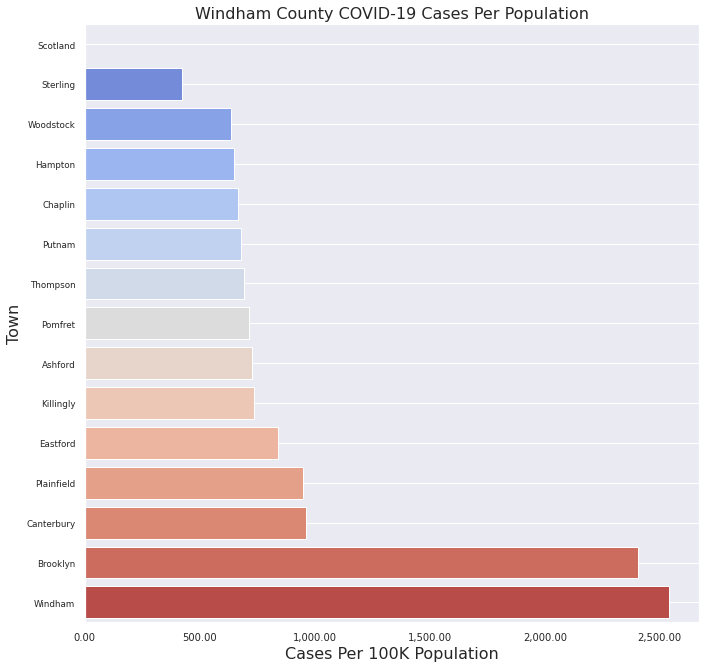

In [ ]:
#Create Temporary DataFrame With Cases Per Population Sorted From Smallest To Largest
temp1 = windham.sort_values(by='Cases_per_100K')

#Set up Standard Seaborn Elements
sns.set_style("darkgrid", {'axes.grid' : False})
sns.set(font_scale=0.8)
plt.rcParams['figure.figsize'] = (11,11)

#Create Barplot with Color Gradient
g = sns.barplot(x='Cases_per_100K', y=temp1.index, data=temp1, palette="coolwarm") #Color Palette Gradient

# #Change X Tick Labels To Show Market Cap In Billions. 
xlabels = ['{:,.2f}'.format(x) for x in g.get_xticks()]

#Formatting x and y ticks - and adding lables and title. 
g.set_xticklabels(xlabels, fontsize=10)
# g.set_yticklabels(labels = temp1['Name'], fontsize=10)
g.set_xlabel('Cases Per 100K Population', fontsize=16)
g.set_ylabel('Town', fontsize=16)
g.set_title('Windham County COVID-19 Cases Per Population', fontsize=16)

#Plor Grid and Show
plt.grid()
plt.show()

Based on cases per population size, Brooklyn and Windham have been the most heavily hit towns in the County. Beyond those two towns, there is a cluster of towns between 500 and 1000 cases per 100K. We want our analysis to focus on the towns that are most in need. We are less concerned with a geographic representation of Windham. With only 15 towns in the County, it is likely that the geographic range of the county will be represented. However, we will look at the issue of geography more closely below. 

**For now, let's capture the top 10 hardest hit towns.** 

In [ ]:
#Create a List Of the 10 Most Affected Towns For Our Model
town_list = temp1['Cases_per_100K'].tail(10).index.tolist()

#Create New DataFrame Subsetting Only Our 10 Towns, While Preserving Additional Data
town_df = windham.loc[town_list]

#Display Table of the Number Of Cases. 
temp1[['Cases_per_100K']].tail(10)

,Cases_per_100K
TOWN,
Putnam,681.213411
Thompson,691.857371
Pomfret,713.606089
Ashford,727.528749
Killingly,734.656100
Eastford,837.988827
Plainfield,949.054241
Canterbury,960.784314
Brooklyn,2403.381643


**Help is on its way to the 10 most affected cities. Each one has COVID-19 cases numbering at $680$ or more per $100,000$ people. The capital city, Windham, has been most influenced with over $2540$ cases per $100K$ since the onset of the pandemic**

## **Mapping The Route**

For the purposes of our model, three major hospitals in Connecticut will be responsible for distributing vaccines to our ten towns. 

* Hartford Hospital
* Lawrence & Memorial Hospital (Groton)
* Yale/New Haven Hospital

<div class="column">
    <img src="https://healthnewshub.org/wp-content/uploads/2016/11/Newshartfordhospital.jpg" width=440"  alt="drawing>
  </div>
  <div class="column">
    <img src="https://cdn.patchcdn.com/users/73762/2013/04/T600x450/39f4a377cee982d681715effd72eadaf.png" width=400>
  </div>
  <div class="column">
    <img src="http://blogs.brandeis.edu/wowblog/files/2014/06/YNHH-Entrance.jpg" width=300">
  </div>
</div> 




**Before we calculate exact distances, let's look at where each of these hospitals are in proximity to our towns. To do so we'll need to add some data for our hospitals**

In [ ]:
#First Create Lists Of Latitude/Longitude For Each Town
lat = town_df['Latitude'].values
lon = town_df['Longitude'].values

# Next Create List of Hospitals
hospitals = ['Yale, New Haven Hospital', 'Hartford Hospital', 'Groton/L&M Hospital']

# Keeping Same Order Create List Of Latitude and Longitude of Hospitals
hlat = [41.3044, 41.7545445, 41.3363]
hlon = [-72.9356,-72.6778707,-72.1046]

**With data structures in place... Let's create the map!**

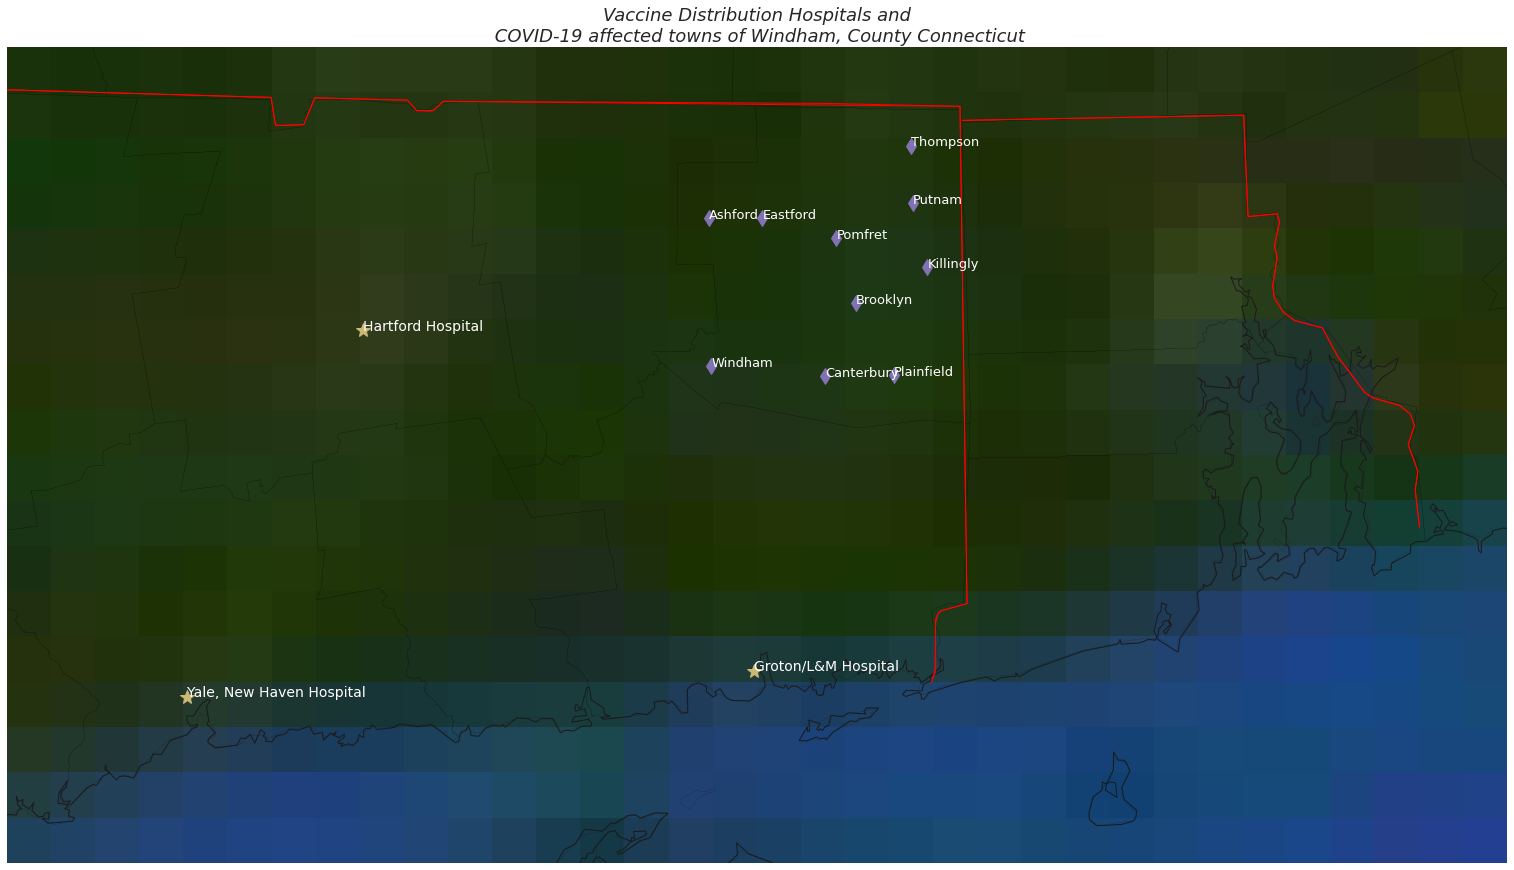

In [ ]:
#Create Figure, FigSize
fig = plt.figure(figsize=(30,15))
# Create Basemap Instance - Miller Projection - 
# High Resolution. #Manually Set Lat/Lon Limits
m = Basemap( projection='mill', resolution='h', 
            llcrnrlat=41.1,urcrnrlat=42.1, 
            llcrnrlon=-73.2, urcrnrlon=-71)

# Set and Plot Lat/Lon Of Towns - Create Magenta Diamond Markers
x,y = m(lon, lat)
m.plot(x,y,'md', markersize=12)
# Set and Plot Lat/Lon of Hospitals - Create Yellow Stars
xhosp,yhosp =  m(hlon, hlat)
m.plot(xhosp,yhosp,'y*', markersize=15)

# Annotate All Towns With While Loop
for i in range(len(town_list)):
  plt.text(x[i], y[i], town_list[i], fontsize=13, color='white')

#Annotate Hospitals With a For Loop
for i in range(len(hospitals)):
  plt.text(xhosp[i], yhosp[i], hospitals[i], fontsize=14, color='white')

#Add Coasts, County/State Lines
m.drawcoastlines()
m.drawcountries(linewidth=2.0, linestyle='solid',color='blue')
m.drawstates(linewidth=1.0, linestyle='solid',color='red')
m.bluemarble()
m.drawmapboundary(fill_color='aqua')
m.drawcounties(color='black')

#Remove Axis, Grid Lines, Add Title And Display
plt.axis('off')
plt.title('Vaccine Distribution Hospitals and\n COVID-19 affected towns of Windham, County Connecticut', fontsize=18, fontstyle='oblique')
plt.grid()
plt.show()

**We can see that our towns are geographically representative of Windham County which will be useful in our analysis. We also observe that Windham County appears to be a remote destination for each of our hospitals to distribute to. Groton and Hartford Hospitals seem to be much closer than Yale-New Haven Hospital. For the purposes of our model, we will need to quantify just how far each town is from our hospitals.**

## **Calculating The Distances**

To calculate the pairwise distances, we will first build a list of lists, containing latitude and longitude of each hospital and each town. We will save it to our **coordinates list**

In [ ]:
# Initialize Empty Coordinates List
coordinates_list = []

# Loop Through Hospitals And Add To Coordinates List (Note: must be lat first for sklearn to work properly!)
for i in range(len(hospitals)):
  coordinates_list.append([hlat[i]] + [hlon[i]])
# Loop Through Towns And Add to Coordinates List
for i in range(len(town_list)):
  coordinates_list.append([lat[i]] + [lon[i]])

# Display Coordinates List
coordinates_list

[[41.3044, -72.9356],
 [41.7545445, -72.6778707],
 [41.3363, -72.1046],
 [41.9093194577146, -71.8711989534025],
 [41.9797342500963, -71.8735879746113],
 [41.867044101718506, -71.983430263771],
 [41.8911163608229, -72.17098562559829],
 [41.831025769004796, -71.84996561528341],
 [41.8915873961555, -72.0919766524868],
 [41.6991630320256, -71.89871628600659],
 [41.697913437685706, -71.9997518338538],
 [41.786982449712205, -71.9545082407126],
 [41.7098093290534, -72.1668123714238]]

Next, we need to convert each of our coordinates to **radians** 

In [ ]:
#Initialize Empty List For Radian Coordinates
radians_list = []
#Loop Through Coordinates List, Convert To Radians, And Add To Radians List
for i in range(len(coordinates_list)):
  radians_list.append([radians(_) for _ in coordinates_list[i]])

#Display Radians List
radians_list

[[0.7208977755607459, -1.2729663619175762],
 [0.7287542791954895, -1.268468137053716],
 [0.721454535592132, -1.2584626758335034],
 [0.7314556118072443, -1.2543890590927762],
 [0.7326845817764132, -1.2544307553787697],
 [0.7307177676526596, -1.2563478649825341],
 [0.7311379078324245, -1.2596213235761897],
 [0.7300891291557267, -1.254018467431409],
 [0.7311461289498716, -1.2582423568567747],
 [0.7277876902347484, -1.254869327148084],
 [0.727765880699203, -1.2566327301195739],
 [0.7293204282205638, -1.2558430804538274],
 [0.7279735031710288, -1.2595484865503224]]

Haversine distances, are the distances between two points on the surface of a sphere. The formula is a bit ugly:

$D(x,y) = 2\cdot\arcsin\cdot\sqrt{\sin^2\frac{x_1 - y_1}{2} + \cos(x_1)\cdot\cos(y_1)\cdot\sin^2\frac{x_2-y_2}{2}}$

Luckily we can compute using a [method in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.haversine_distances.html). With this method it is easy to create a matrix of distances. 

In [ ]:
# Compute Haversine Distances Between Each Point In our Radians List
result = haversine_distances([x for x in radians_list])

#Multiply By 6371 to get distance in kilometers, if we wanted Miles we would use 3956
results = result * 6371 

#Create New DataFrame To Store Distances
distances = pd.DataFrame(results)

#Add Names of Columns and Index - Being Sure to Store Original Order
distances.columns = hospitals + town_list
distances.index = hospitals + town_list

#Display Matrix of Distances In km
distances

,"Yale, New Haven Hospital",Hartford Hospital,Groton/L&M Hospital,Putnam,Thompson,Pomfret,Ashford,Killingly,Eastford,Plainfield,Canterbury,Brooklyn,Windham
"Yale, New Haven Hospital",0.000000,54.457734,69.487708,111.156707,115.873882,100.921976,91.096825,107.637978,95.833201,96.865138,89.378674,97.701688,78.296458
Hartford Hospital,54.457734,0.000000,66.625306,69.014223,71.150956,58.898231,44.663241,69.159967,50.884329,64.952588,56.627134,60.097300,42.698715
Groton/L&M Hospital,69.487708,66.625306,0.000000,66.604926,74.075818,59.869866,61.939119,58.946849,61.754058,43.838625,41.146237,51.646047,41.854024
Putnam,111.156707,69.014223,66.604926,0.000000,7.832260,10.411962,24.893772,8.881620,18.378311,23.479374,25.809541,15.253408,33.051971
Thompson,115.873882,71.150956,74.075818,7.832260,0.000000,15.479018,26.500199,16.650786,20.552291,31.267468,33.034063,22.455532,38.611179
Pomfret,100.921976,58.898231,59.869866,10.411962,15.479018,0.000000,15.756869,11.757968,9.391859,19.945268,18.855101,9.219353,23.169744
Ashford,91.096825,44.663241,61.939119,24.893772,26.500199,15.756869,0.000000,27.411793,6.540167,31.064824,25.749441,21.346870,20.163390
Killingly,107.637978,69.159967,58.946849,8.881620,16.650786,11.757968,27.411793,0.000000,21.142947,15.209739,19.323972,9.952919,29.531836
Eastford,95.833201,50.884329,61.754058,18.378311,20.552291,9.391859,6.540167,21.142947,0.000000,26.729951,22.852414,16.278319,21.143275
Plainfield,96.865138,64.952588,43.838625,23.479374,31.267468,19.945268,31.064824,15.209739,26.729951,0.000000,8.389552,10.806625,22.287874


**Fantastic! A Matrix of distances in kilometers between each of our towns and hospitals.**

## **Network Flow Diagram**

To conceptualize the movement of vaccines from the distribution hospitals to the affected towns and interpret the results from the distance matrix, we will create a network flow diagram. 

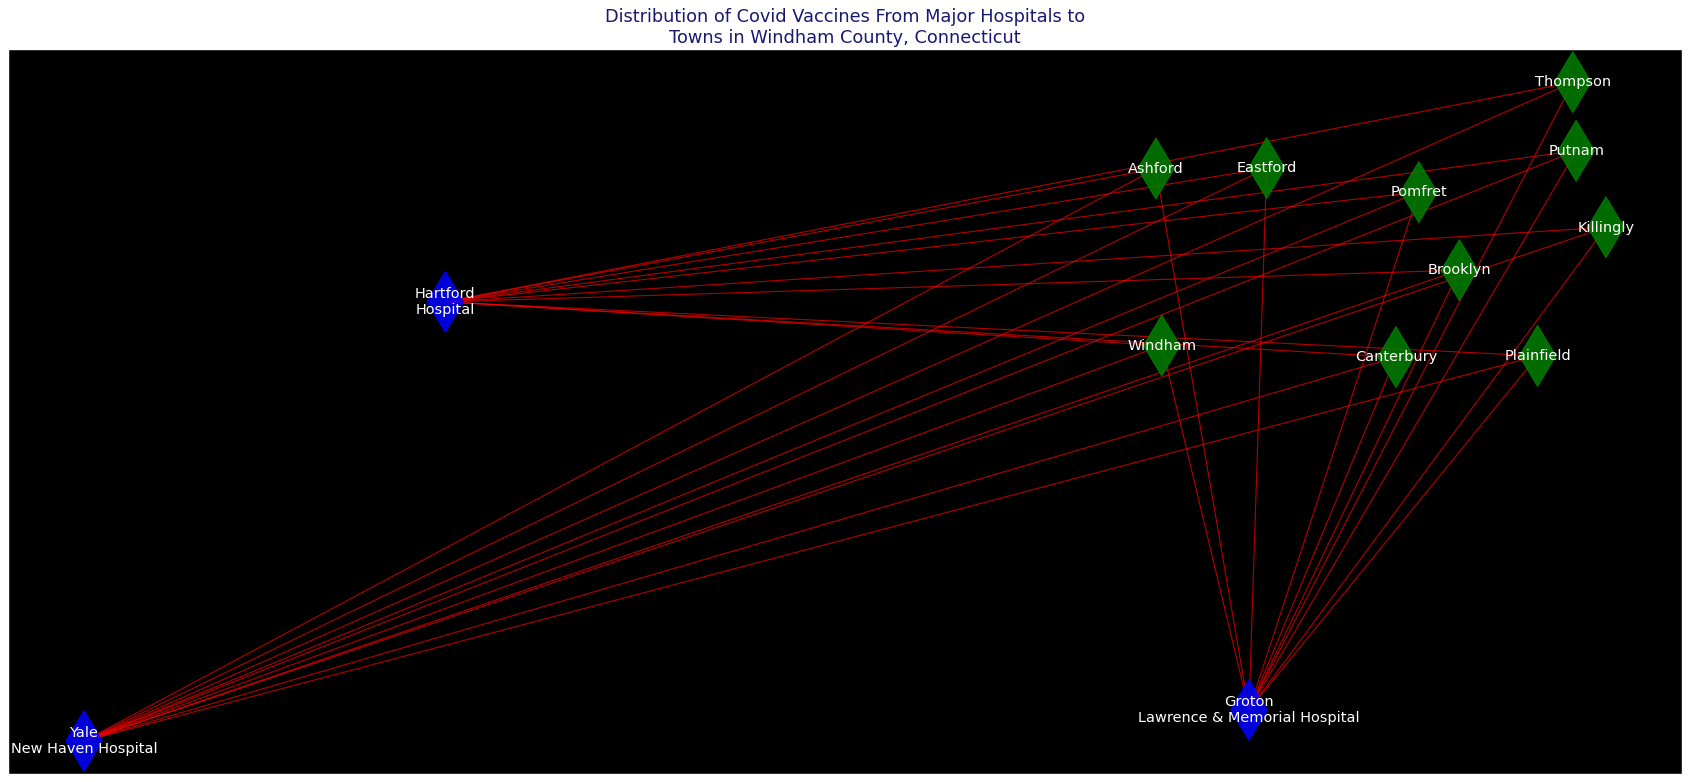

In [ ]:
#Standard Plot Elements Create Blue Border Black Background
figure(num=None, figsize=(27, 12), dpi=80)
sns.reset_orig()
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'aliceblue'})

#Create NetworkX Instance - Add Edges: Each Row For Each Hospital
G = nx.DiGraph()
G.add_edges_from(
    [('Y', 'T'), ('Y', 'E'), ('Y', 'A'),('Y', 'P'), ('Y', 'K'), ('Y', 'PU'), ('Y', 'B'), ('Y', 'PL'), ('Y', 'CA'), ('Y', 'W'),
     ('H', 'T'), ('H', 'E'), ('H', 'A'),('H', 'P'), ('H', 'K'), ('H', 'PU'), ('H', 'B'), ('H', 'PL'), ('H', 'CA'), ('H', 'W'),
     ('G', 'T'), ('G', 'E'), ('G', 'A'),('G', 'P'), ('G', 'K'), ('G', 'PU'), ('G', 'B'), ('G', 'PL'), ('G', 'CA'), ('G', 'W')])

# Create Town Labels For Each Hospital/Town
labels = {'Y':'Yale\nNew Haven Hospital', 'H':'Hartford\nHospital', 'G':'Groton\nLawrence & Memorial Hospital', 
          'T':'Thompson', 'E':'Eastford','A':'Ashford','P':'Pomfret','K':'Killingly','PU':'Putnam', 'B':'Brooklyn',
          'PL':'Plainfield', 'CA':'Canterbury', 'W':'Windham'}

# Hardcoded Lat/Lon For Positioning
fixed_positions = {'Y':(-72.9356,41.3044),'H':(-72.67787707, 41.7545445),'G':(-72.1046, 41.3363) ,
                   'T':(-71.8735879746113, 41.9797342500963),'E':(-72.0919766524868, 41.8915873961555),
                   'A':(-72.17098562559829, 41.8911163608229),'P':(-71.983430263771, 41.867044101718506), 
                   'K':(-71.84996561528341, 41.831025769004796),'PU':(-71.871199, 	41.909319),
                   'B':(-71.9545082407126, 41.786982449712205),'PL':(-71.89871628600659, 41.6991630320256), 
                   'CA':(-71.9997518338538, 41.697913437685706),'W':(-72.1668123714238, 41.7098093290534)} 

# Create Variable for Nodes as the Keys
fixed_nodes = fixed_positions.keys() 

#Create A Color Map To Distinguish Between Hospitals And Towns - If Node Is a Hosptial - Set To Blue - Else Green
color_map = []
for node in G:
    if node == 'Y' or node == 'G' or node == 'H':
        color_map.append('blue')
    else: 
        color_map.append('green')

# Aesthetic Elements
pos = nx.spring_layout(G, k=2, pos=fixed_positions  ,fixed=fixed_nodes, iterations=100, threshold=0.0001, weight='weight', scale=1, center= [0,100], dim=2)
nx.draw_networkx_labels(G, pos, labels=labels, font_color='white', font_size=13)
nx.draw_networkx_nodes(G, pos=fixed_positions,  node_size = 1500, node_color= color_map, alpha=.85, node_shape='d' )
nx.draw_networkx_edges(G, pos, arrows=False, arrowsize= 30, alpha=0.7, min_target_margin=5, edge_color='red')

#Add Title - And Display
plt.title('Distribution of Covid Vaccines From Major Hospitals to\nTowns in Windham County, Connecticut', fontsize=16, color='midnightblue')
plt.grid()
plt.show()

**Our model will analyze how best to distribute vaccines from the hospitals(blue diamonds) to the 10 towns(green diamonds). What is most important, is the distance between hospital and town. From our distance matrix, the distance between town to town is irrelevant. Let's subset our data focusing only on the distance between hospital and town.** 

In [ ]:
#Distances Between Our 3 Distribution Hospitals and 10 Towns in Focus
distances.loc[town_list, hospitals]

,"Yale, New Haven Hospital",Hartford Hospital,Groton/L&M Hospital
Putnam,111.156707,69.014223,66.604926
Thompson,115.873882,71.150956,74.075818
Pomfret,100.921976,58.898231,59.869866
Ashford,91.096825,44.663241,61.939119
Killingly,107.637978,69.159967,58.946849
Eastford,95.833201,50.884329,61.754058
Plainfield,96.865138,64.952588,43.838625
Canterbury,89.378674,56.627134,41.146237
Brooklyn,97.701688,60.097300,51.646047
Windham,78.296458,42.698715,41.854024


There are a total of 30 distances that are of interest. 

**To achieve further detail, let's break up the distances into quantiles.**

In [ ]:
#Create Table of Percentiles at Min, .25, .5, .75 and Max
percentile_table = distances.loc[town_list, hospitals].quantile([0, .25, .5, .75, 1])

#Change Column Name of the Index and Display
percentile_table.index.set_names("Percentiles", inplace=True)
percentile_table

,"Yale, New Haven Hospital",Hartford Hospital,Groton/L&M Hospital
Percentiles,,,
0.00,78.296458,42.698715,41.146237
0.25,92.280919,52.320031,45.790480
0.50,97.283413,59.497766,59.408358
0.75,105.958977,67.998814,61.892854
1.00,115.873882,71.150956,74.075818


**Now it's easy to see what we are up against!**

* The average town in  Windham is about $60$ miles away from  Hartford and Groton Hospital, while the average town is about $97$ miles away from Yale New Haven Hospital
* As expected Groton and Hartford Hospital are much closer to the towns in Windham County than Yale-New Haven. 
* In fact, the minimum distance from Yale to any town is greater than the maximum distance from Hartford and Groton to any town. 
* Groton is slightly closer to the nearest town than Hartford. But is slightly farther from its most-distant town than Hartford is to its most-distant town. 

These conclusions are important to remember as we build our model and analyze its output. 

# **Baseline - Deterministic Model**

## **Input Data**



Our model requires input data for:

* **Vaccine Supply**
* **Vaccine Demand**
* **Shipping Cost**
* **Arcs or possible routes**

Let's begin with **supply** and **demand.** For the purposes of our simplified model, we will assume unlimited supply. To do so, we will create a supply dictionary with each of our hospitals and set the supply to 10M. This number is intentionally  large so that there is no danger of depletion. 

In [ ]:
# Initialize Empty Supply Dictionary
supply_dict = {}
# Set Supply = to 10M For Each Hospital and Save To Dictionary
for h in hospitals:
  supply_dict[h] = 10 ** 7
#Display
supply_dict

{'Groton/L&M Hospital': 10000000,
 'Hartford Hospital': 10000000,
 'Yale, New Haven Hospital': 10000000}

For decision makers, the demand for vaccines, is trickier to ascertain. We will assume that demand will be higher in towns where there have been more cases of COVID-19. For this reason, we will use `Total Cases` of COVID-19 on October, 28th as our best estimate for demand. 

In [ ]:
#Create demand dictionary - using Total Cases on October 28th as input Data. 
demand_dict = (town_df['Total_cases']).to_dict()
#Display
demand_dict

{'Ashford': 31,
 'Brooklyn': 199,
 'Canterbury': 49,
 'Eastford': 15,
 'Killingly': 127,
 'Plainfield': 144,
 'Pomfret': 30,
 'Putnam': 64,
 'Thompson': 65,
 'Windham': 628}

Next, we must consider all the potentital paths that can be used to distribute vaccines to each of our towns. This was given by our network flow diagram. Each hospital can deliver to all 10 towns, but no town can deliver to another town. At the same time, we can set lower and upper bounds for how many vaccines will travel on any particular route. $5000$ seems like a good upper bound number given our demand dictionary. This value affords us some room for growth as demand increases. There are a total of $30$ potential routes:

$3$ $hospitals \cdot 10$ $towns = 30$ $arcs$

In [ ]:
#Initialize Dictionary For Lower And Upper Bounds
LB = {}
UB = {}

#Nested For Loop - Each Hospital Can Deliver To Each Town
for h in hospitals:
  for town in town_list:
    LB[town, h] = 0
    UB[town, h] = 5000

#Save the Keys as the List of Potential Paths, or Arcs.
arcs = list(LB.keys())

#Display the Potential Paths
arcs

[('Putnam', 'Yale, New Haven Hospital'),
 ('Thompson', 'Yale, New Haven Hospital'),
 ('Pomfret', 'Yale, New Haven Hospital'),
 ('Ashford', 'Yale, New Haven Hospital'),
 ('Killingly', 'Yale, New Haven Hospital'),
 ('Eastford', 'Yale, New Haven Hospital'),
 ('Plainfield', 'Yale, New Haven Hospital'),
 ('Canterbury', 'Yale, New Haven Hospital'),
 ('Brooklyn', 'Yale, New Haven Hospital'),
 ('Windham', 'Yale, New Haven Hospital'),
 ('Putnam', 'Hartford Hospital'),
 ('Thompson', 'Hartford Hospital'),
 ('Pomfret', 'Hartford Hospital'),
 ('Ashford', 'Hartford Hospital'),
 ('Killingly', 'Hartford Hospital'),
 ('Eastford', 'Hartford Hospital'),
 ('Plainfield', 'Hartford Hospital'),
 ('Canterbury', 'Hartford Hospital'),
 ('Brooklyn', 'Hartford Hospital'),
 ('Windham', 'Hartford Hospital'),
 ('Putnam', 'Groton/L&M Hospital'),
 ('Thompson', 'Groton/L&M Hospital'),
 ('Pomfret', 'Groton/L&M Hospital'),
 ('Ashford', 'Groton/L&M Hospital'),
 ('Killingly', 'Groton/L&M Hospital'),
 ('Eastford', 'Groton/L

The cost to ship is determined, in part, by the distance in kilometers between hospital and town. This work was already computed in the distance matrix. Let us formalize this data, in a cost dictionary using the information from the matrix.   

In [ ]:
#Create an Empty Shipping Cost Dictionary
cost_dict = {}
#Loop Through Each Path and Assign the Cost from the Distances Matrix, Round to Nearest Penny. 
for arc in arcs:
  t, h = arc[0], arc[1]
  cost_dict[arc] = distances.loc[t, h].round(2)
#Display Shipping Cost Dictionary
cost_dict

{('Ashford', 'Groton/L&M Hospital'): 61.94,
 ('Ashford', 'Hartford Hospital'): 44.66,
 ('Ashford', 'Yale, New Haven Hospital'): 91.1,
 ('Brooklyn', 'Groton/L&M Hospital'): 51.65,
 ('Brooklyn', 'Hartford Hospital'): 60.1,
 ('Brooklyn', 'Yale, New Haven Hospital'): 97.7,
 ('Canterbury', 'Groton/L&M Hospital'): 41.15,
 ('Canterbury', 'Hartford Hospital'): 56.63,
 ('Canterbury', 'Yale, New Haven Hospital'): 89.38,
 ('Eastford', 'Groton/L&M Hospital'): 61.75,
 ('Eastford', 'Hartford Hospital'): 50.88,
 ('Eastford', 'Yale, New Haven Hospital'): 95.83,
 ('Killingly', 'Groton/L&M Hospital'): 58.95,
 ('Killingly', 'Hartford Hospital'): 69.16,
 ('Killingly', 'Yale, New Haven Hospital'): 107.64,
 ('Plainfield', 'Groton/L&M Hospital'): 43.84,
 ('Plainfield', 'Hartford Hospital'): 64.95,
 ('Plainfield', 'Yale, New Haven Hospital'): 96.87,
 ('Pomfret', 'Groton/L&M Hospital'): 59.87,
 ('Pomfret', 'Hartford Hospital'): 58.9,
 ('Pomfret', 'Yale, New Haven Hospital'): 100.92,
 ('Putnam', 'Groton/L&M Hos

## **Decision Variables**

There is one set of decision variables that our model must optimize. 


* $qvac_a$ - A NonNegative Real Number. Stands for `Quantity of Vaccines`. For each arc in the set of arcs, how many vaccines do we ship on that route?

There are 30 arcs, therefore there are 30 decision variables that must be calculated. 

## **Objective Function**

Our objective is to minimize the cost of distributing vaccines while covering the demand for our 10 towns. 

The cost of shipping is determined by, both the quantity of vaccines shipped, as well as the distance to deliver those vaccines from hospital to town. 


The objective function is given by:

$min \sum\limits_{a \in A} qvac_a * ship$ $distance_a$

Where a in an arc in the set of all arcs A. 

## **Constraints**

We will assume 2 sets of Constraints in our model:

1. **Source Constraints** - Which itself includes two subsets.  
  
  a. **Supply Constraint** - No hospital can supply more than 10M vaccines. As discussed above, this constraint is essentially a placeholder as there is no real danger of this amount ever being exceeded. 
  
    * **There are a total of 3 Supply Constraints - 1 for each hospital**
  
  b. **Supply Mix Constraint** - All hospitals must supply at least $30\%$ of the total vaccines delivered. Mathematically we can express this in three equations where each hosptial assumes the **h1** position: 
    - $ 0.7 * qvac_{h1} - 0.3 * qvac_{h2} - 0.3 * qvac_{h3} \geq 0$

    * **There are a total of 3 Supply Mix Contraints - One for each hospital.** 

    * **This means there are 6 Source Constraints.** 

2. **Demand Constraints** - We must ensure that every town has its demand met. We could model this as a greater than constraint, but we can assume that oversupplying vaccines would not minimize our objective function therefore we use an equality constraint.
  - $\sum\limits_{h \in Hospitals} qvac[t, h] = Demand[town]$

    * **There are a total of 10 demand constraints, one for each town.** 

    * **In sum, there are 16 constraints in our model**

**With preliminary setup out of the way. Let's Model!**


## **Model 1 Implementation**

In [ ]:
#Declare Model Instance
model = ConcreteModel()

# Alias Hospitals and Towns
hosp = hospitals
town = town_list

#Declare Decision Variables
model.qvac = Var(arcs, domain=NonNegativeReals)

#Objective Function - Quantity of Vaccines * Shipping Cost
model.Cost = Objective(
    expr = sum(([model.qvac[t, h]  * cost_dict[t, h] for t in town for h in hosp])),
    sense = minimize)

#2 Types of Constraints
model.src = ConstraintList()
model.dmd = ConstraintList()

#Empty List For Mix Constraint - Yes, Expression 4.
expr4 = []

#Source Constraints - Add To Expression 4 For Mix Constraint. And Ensure
# We not exceed 10M vaccines from any given hospital
for h in hosp:
  add_expr4=0
  add_expr4 += sum([model.qvac[t,h] for t in town])
  model.src.add(add_expr4 <= supply_dict[h])
  expr4.append(add_expr4)

#Add Mix Constraints - Each Hospital Assumes the Role As Hospital 1. 
model.src.add(expr = .7 * expr4[0] - .3 * expr4[1] - .3 * expr4[2] >= 0)
model.src.add(expr = .7 * expr4[1] - .3 * expr4[0] - .3 * expr4[2] >= 0)
model.src.add(expr = .7 * expr4[2] - .3 * expr4[1] - .3 * expr4[0] >= 0)

#Demand Constraints - Ensure The Sum of Vaccines To Each Town From All 3 Hospitals
# Is equal to the demand for that Town. 
for t in town:
    model.dmd.add(sum([model.qvac[t,h] for h in hosp]) == demand_dict[t])

#Solve and Print
results = SolverFactory('cbc').solve(model)
results.write()
model.pprint()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 80252.782
  Upper bound: 80252.782
  Number of objectives: 1
  Number of constraints: 17
  Number of variables: 31
  Number of nonzeros: 30
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of 

In [ ]:
# Display Model Results
if 'ok' == str(results.Solver.status):
    #Display Information
    total_vaccines = sum([model.qvac[t,h]() for t in town for h in hosp])
    print("Total Shipping Costs = ",round(model.Cost(),2))
    print("Total Number Of Vaccines Delivered = ", total_vaccines)
    print("\nShipping Table:")
    for h in hosp:
      print('*'*100)
      ship_cost = 0
      vaccines = 0
      for t in town:
        if model.qvac[t,h]() > 0:
          print("Ship from ", h," to ", t, ":", model.qvac[t,h]())
          #Calculate Total Vaccines And Total Cost for each hospital
          ship_cost += model.qvac[t,h] * cost_dict[t,h]
          vaccines += model.qvac[t,h]()
      print('\t\tBudget To Ship From', h, '$', round(ship_cost(),2))
      print('\t\tTotal Vaccines Shipped From', h, ':', round(vaccines,2))
      print('\t\tPercentage of Vaccines Delivered from', h, ':',  round((vaccines/total_vaccines) * 100), '%')
else:
    print("No Valid Solution Found")

Total Shipping Costs =  80252.78
Total Number Of Vaccines Delivered =  1352.0

Shipping Table:
****************************************************************************************************
Ship from  Yale, New Haven Hospital  to  Windham : 405.6
		Budget To Ship From Yale, New Haven Hospital $ 31758.48
		Total Vaccines Shipped From Yale, New Haven Hospital : 405.6
		Percentage of Vaccines Delivered from Yale, New Haven Hospital : 30.0 %
****************************************************************************************************
Ship from  Hartford Hospital  to  Putnam : 42.2
Ship from  Hartford Hospital  to  Thompson : 65.0
Ship from  Hartford Hospital  to  Pomfret : 30.0
Ship from  Hartford Hospital  to  Ashford : 31.0
Ship from  Hartford Hospital  to  Eastford : 15.0
Ship from  Hartford Hospital  to  Windham : 222.4
		Budget To Ship From Hartford Hospital $ 20948.11
		Total Vaccines Shipped From Hartford Hospital : 405.6
		Percentage of Vaccines Delivered from Hartford

## **Model 1 - Debrief**

**Success! Cost minimized at $\$80,252.78$**

* It is not surprising to see a shipping table that has just one shipement from Yale New Haven Hospital given our analysis - and observation that Yale was the furthest Hospital from Windham County. 

* The model handles this distance, by delivering a large quantity of vaccines from Yale to the capital, Windham, which has the highest demand for vaccines. In other words, it makes that trip count. 

* Not supringly the 30% mix requirement is active at Yale-New/Haven hospital. Perhaps a bit more surprising is that it is also active at Hartford Hospital, which is much closer to Windham County than Yale, but is closer to at least some of the towns than Groton

* During our EDA we had determined that for a lot of the towns in Windham , Groton was the closest Hospital. It is not surprising to see that Groton delivers more vaccines than the other two towns. 

The baseline model gives us a good idea of model behavior. The more interesting, and ultimately more important problem, however, is answering the optimization question given uncertainty in demand. 

# **Monte Carlo**

## **Simulation Model 1 - Triangular Distribution of Demand**

What will the vaccine demand in each of our towns look like 1 month from Day 0?

For decision makers in Connecticut and beyond, the static model will do little to help determine shipping budgets or production requirements in the future. 

Instead, decision makers must consider the probability distribution of future demand in order to prepare for a variety of potential outcomes. How can they build these distributions [when outcomes are not easily predicted](https://www.investopedia.com/terms/m/montecarlosimulation.asp)? One available method is **Monte Carlo Simulation**.

The good news is that, to build a Monte Carlo model, very little needs to change from the formulation of the static model. It has the same decision variables, same objective and same constraints. However, some of the input data, in particular, that of demand for vaccines will change. 

**Differences include**
  1. Random Number Generator using a Triangular Distribution. 
      - Demand for each of our 10 towns is uncertain.
      - We will use a triangular distribution to generate 10 new demand numbers for each of our towns in each iteration. Triangular distributions are [appropriate given uncertainty.](https://wiki.analytica.com/index.php?title=Triangular_distribution&title=Triangular_distribution)
      - Triangular distributions are parameterized by min, mode, and max.




![](https://www.mhnederlof.nl/images/triangularpdf.jpg)

For our random number generator we will use. 
- $min = current$ $demand$
- $mode = current$ $demand$ $\cdot 2$
- $max = current$ $demand$ $\cdot 5$

2. We will run the simulation 10,000 times - and store both
 - The total number of vaccines demanded during each iteration
 - The optimal shipping cost generated from our model of each iteration. 

This type of model will aid decision makers both in planning for shipping budgets and in capacity planning for vaccine production. Our parameters have been established to estimate demand, 1 month from the baseline model. 

**Let's run the simulation!**


In [ ]:
# Create empty lists to store results During Each Iteration
costs = []
demand = []

#Loop of 10,000 Simulations
for a in np.arange(0,10000,1):
  #Declare Model
  model = ConcreteModel()
  
  #Initialize a New Dictionary of Town Demands
  new_dict = {}
  
  #For Each Town - Update Demand Based on Triangular Distribution With Min(Current)
  #Mode - Current *2, and Max Current *5
  for t in town_list:
    new_dict[t] = round(np.random.triangular(demand_dict[t], demand_dict[t] * 2, demand_dict[t] *5))
  
  #Initialize Quantity of Vaccines Decision Variable
  model.qvac = Var(arcs, domain=NonNegativeReals)
 
  #Same Objective Function (Qty of Vaccines in Arc * Shipping Cost of Arc)
  model.Cost = Objective(
      expr = sum([model.qvac[t,h] * cost_dict[t,h] for t in town for h in hosp]),
      sense = minimize)
  
  #Create Constraints Lists
  model.src = ConstraintList()
  model.dmd = ConstraintList()
  
  #Expression 4 is Back for Dual Usage to Build Hospital Mix Constraint and Hospital Supply Constraint
  expr4 = []
  for h in hosp:
    add_expr4=0
    add_expr4 += sum([model.qvac[t,h] for t in town])
    model.src.add(add_expr4 <= supply_dict[h])
    expr4.append(add_expr4)

  #Demand Constraints
  for t in town:
    model.dmd.add(sum([model.qvac[t,h] for h in hosp]) == new_dict[t])

  # Mix Constraints
  model.src.add(expr = .7 * expr4[0] - .3 * expr4[1] - .3 * expr4[2] >= 0)
  model.src.add(expr = .7 * expr4[1] - .3 * expr4[0] - .3 * expr4[2] >= 0)
  model.src.add(expr = .7 * expr4[2] - .3 * expr4[1] - .3 * expr4[0] >= 0)
           
  results = SolverFactory('cbc').solve(model)
  results.write()

  #Append Costs and The Sum of Total Vaccines To Empty Lists
  costs = np.append(costs, model.Cost())
  demand = np.append(demand, sum(list(new_dict.values())))


Streaming output truncated to the last 5000 lines.
  Error rc: 0
  Time: 0.028931140899658203
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 205138.492
  Upper bound: 205138.492
  Number of objectives: 1
  Number of constraints: 17
  Number of variables: 31
  Number of nonzeros: 30
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- St

## **Simulation 1 Analysis**

Let's take a look at the distribution of our results. 

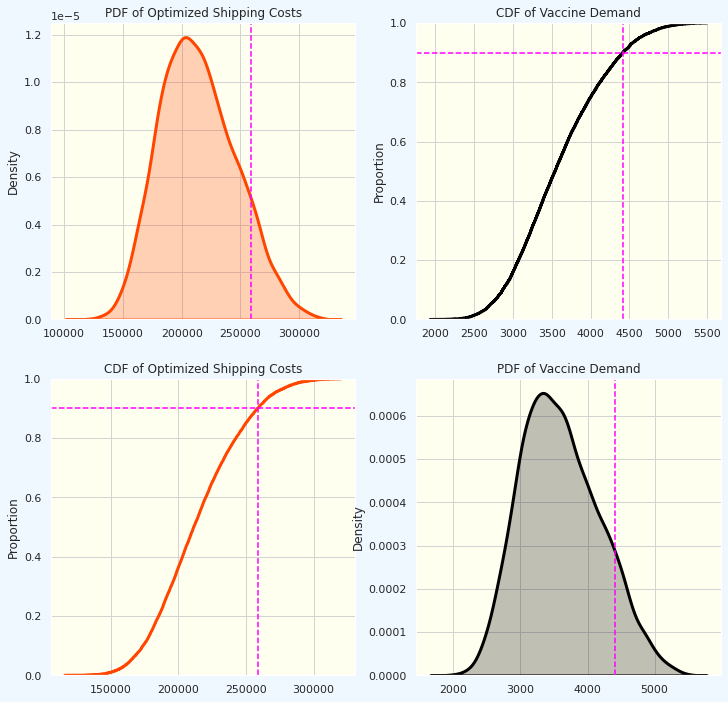

In [ ]:
# Create Figure and Set Up Elements
fig = plt.figure(figsize=(12,12))
sns.reset_orig()
sns.set(rc={'axes.facecolor':'ivory', 'figure.facecolor':'aliceblue'})

# Assign 4 Subplots to Figure
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

#Probability Distribution of Shipping Costs
#Set Title and Fill in With Shipping Costs - Plot 90% Empirical Confidence Line
ax1.set_title('PDF of Optimized Shipping Costs')
sns.kdeplot(costs, ax=ax1, fill=True, lw=3, color='orangered')
ax1.axvline(np.quantile(costs, .9), linestyle='dashed', color='magenta')

#Cumulative Density of Vaccine Demand
#Set Title and Fill in With Shipping Costs - Plot 90% Empirical Confidence Line
sns.ecdfplot(demand, ax=ax2, lw=3, color='black')
ax2.set_title('CDF of Vaccine Demand')
ax2.axvline(np.quantile(demand, .9), linestyle='dashed', color='magenta')
ax2.axhline(.9, linestyle='dashed', color='magenta')

#Cumulative Density of Shipping Costs
#Set Title and Fill in With Shipping Costs - Plot 90% Empirical Confidence Line
ax3.set_title('CDF of Optimized Shipping Costs')
sns.ecdfplot(costs, ax=ax3, lw=3, color='orangered')
ax3.axvline(np.quantile(costs, .9), linestyle='dashed', color='magenta')
ax3.axhline(.9, linestyle='dashed', color='magenta')


#Probability Distribution of Vaccine Demand
#Set Title and Fill in With Shipping Costs - Plot 90% Empirical Confidence Line
sns.kdeplot(demand, ax=ax4, fill=True, lw=3, color='black')
ax4.set_title('PDF of Vaccine Demand')
ax4.axvline(np.quantile(demand, .9), linestyle='dashed', color='magenta')

#Set GridLines
ax1.grid(color='lightgrey')
ax2.grid(color='lightgrey')
ax3.grid(color='lightgrey')
ax4.grid(color='lightgrey')

#Display
plt.show()

**Great! The simulation has run and we now have 10,000 optimized shipping costs and 10,000 different total vaccine demands.**

We have plotted the 90% empirical confidence level with magenta lines, to show what we might recommend to decision makers, for budgeting shipping costs, and planning production for Windham County. Clearly, the results from the triangular distribution will increase our costs from the baseline case. The 90% empirical confidence levels are:



In [ ]:
#Display 90% Empirical Confidence Level for Shipping Costs
print('We can tell the decision makers, that with 90% confidence:') 

print('\na shipping budget of $', round(np.quantile(costs, .9),2), 'should be adequate to cover shipping costs for our 10 towns in Windham.')

#Display 90% Empirical Confidence Level for Vaccine Production
print('\na production of ', ceil(np.quantile(demand, .9)), 'vaccines should be adequate to cover demand for our 10 towns in Windham.')

We can tell the decision makers, that with 90% confidence:

a shipping budget of $ 258668.92 should be adequate to cover shipping costs for our 10 towns in Windham.

a production of  4416.0 vaccines should be adequate to cover demand for our 10 towns in Windham.


## **Simulation 2 - Relaxing The Supply Mix Constraint**

In order to achieve smaller budgets, we can look at some of our constraints and see if loosening them allows for better performance. One of these constraints is the mix constraint, that requires that at least $30\%$ of our vaccines to come from each hospital. Let's rerun the model, and reduce the mix constraint to$10\%$ per hospital. Yale Hospital, in particular, has a long travel distance to reach Windham. By reducing the required contribution, we hypothesize we will be able to save some money. 

To achieve this result we simply adjust the mix constraint equation to:

- $ 0.9 * qvac_{h1} - 0.1 * qvac_{h2} - 0.1 * qvac_{h3} \geq 0$

Where each hospital assumes the role of hospital 1. 

Let's Model. 

In [ ]:
# Create empty lists to store results During Each Iteration
costs1 = []
demand1 = []

#Loop of 10,000 Simulations
for a in np.arange(0,10000,1):
  #Declare Model
  model = ConcreteModel()
  
  #Initialize a New Dictionary of Town Demands
  new_dict = {}
  
  #For Each Town - Update Demand Based on Triangular Distribution With Min(Current)
  #Mode - Current *2, and Max Current *5
  for t in town_list:
    new_dict[t] = round(np.random.triangular(demand_dict[t], demand_dict[t] * 2, demand_dict[t] *5))
  
  #Initialize Decision Variables
  model.qvac = Var(arcs, domain=NonNegativeReals)
 
  #Same Objective Function (Qty of Vaccines in Arc * Shipping Cost of Arc)
  model.Cost = Objective(
      expr = sum([model.qvac[t,h] * cost_dict[t,h] for t in town for h in hosp]),
      sense = minimize)
  
  #Create Constraints Lists
  model.src = ConstraintList()
  model.dmd = ConstraintList()
  
  #Expression 4 is Back for Dual Usage to Build Hospital Mix Constraint and Hospital Supply Constraint
  expr4 = []
  for h in hosp:
    add_expr4=0
    add_expr4 += sum([model.qvac[t,h] for t in town])
    model.src.add(add_expr4 <= supply_dict[h])
    expr4.append(add_expr4)

  #Demand Constraints
  for t in town:
    model.dmd.add(sum([model.qvac[t,h] for h in hosp]) == new_dict[t])

  # Change Source Mix Constraints For Model 2. 
  model.src.add(expr = .9 * expr4[0] - .1 * expr4[1] - .1 * expr4[2] >= 0)
  model.src.add(expr = .9 * expr4[1] - .1 * expr4[0] - .1 * expr4[2] >= 0)
  model.src.add(expr = .9 * expr4[2] - .1 * expr4[1] - .1 * expr4[0] >= 0)
           
  results = SolverFactory('cbc').solve(model)
  results.write()

  #Append Costs and The Sum of Total Vaccines To Empty Lists
  costs1.append(model.Cost())
  demand1.append(sum(list(new_dict.values())))


Streaming output truncated to the last 5000 lines.
  Error rc: 0
  Time: 0.029808759689331055
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 202197.48
  Upper bound: 202197.48
  Number of objectives: 1
  Number of constraints: 17
  Number of variables: 31
  Number of nonzeros: 30
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Stat

## **Simulation 2 Analysis**



### **Vaccine Demand**

The simulation did not alter any of the parameters related to vaccine demand. We would expect to see a very similar distribution in simulation 2, to what we saw in simulation 1. 

What might be interesting to see here, is to see how well our established parameters performed against reality. If we will remember, Day 0 was October 28th. We used the triangular distribution to predict vaccine demand a month from that date using total cases as an estimator. Let's explore the actual sum of COVID-19 cases in our 10 towns, 1 month after Day0. 

In [ ]:
# #Subset 31 Days After Day0 - November, 29 2020
day31 = ct_covid_data[ct_covid_data['Date'] == '29-11-2020']

# #Subset With Columns of Interest to Our Analysis Total Cases
day31 = day31['Total_cases']

# Store Sum of Day 31 in our 10 Towns 
day31_windham = day31.loc[town_list].sum()
print("One month after Day 0, the actual number of COVID cases in our 10 towns was:", day31_windham)

One month after Day 0, the actual number of COVID cases in our 10 towns was: 2389


**Where does this number fall in our simulation?**

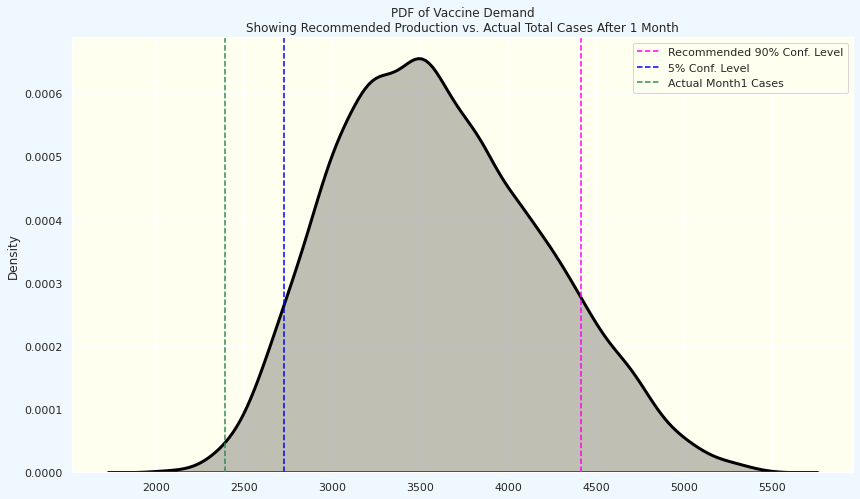

In [ ]:
#Standard Plot Set UP
fig = plt.figure(figsize=(14,8))
sns.reset_orig()
sns.set(rc={'axes.facecolor':'ivory', 'figure.facecolor':'aliceblue'})

#Add Plot
ax = fig.add_subplot(1, 1, 1)
#Probability Distribution of Vaccine Demand
sns.kdeplot(demand1, ax=ax, fill=True, lw=3, color='black')
ax.set_title('PDF of Vaccine Demand\nShowing Recommended Production vs. Actual Total Cases After 1 Month')
#Add vertical lines for 90% Conf. - 5% Conf. and Actual Cases
ax.axvline(np.quantile(demand1, .9), linestyle='dashed', color='magenta', label='Recommended 90% Conf. Level')
ax.axvline(np.quantile(demand1, .05), linestyle='dashed', color='blue', label='5% Conf. Level')
ax.axvline(day31_windham, linestyle='dashed', color='seagreen', label='Actual Month1 Cases')

#Display Plot
ax.legend()
plt.show()

**If our assumption that $Demand = Cases$ is correct, it looks like our recommendation at the $90\%$ confidence level would have produced quite a bit more vaccines than required!**

This requires further study. 
  * For one, vaccine demand does not necessarily equate to total cases. Research should explore how we might better predict vaccine demand.
  * Second, with or without better predictors, we might adjust the parameters of the triangular distribution to more accurately reflect reality. 
  * Finally, it is worth noting that the actual result for cases of COVID after 1 month does exist on the distribution of potential outcomes for our 10 towns, but that our recommendation at the $90\%$ confidence level was a bit more than required. 

### **Shipping Costs**

Unlike vaccine demand, we would expect the reduced mix-constraint in simulation to reduce shipping costs. 

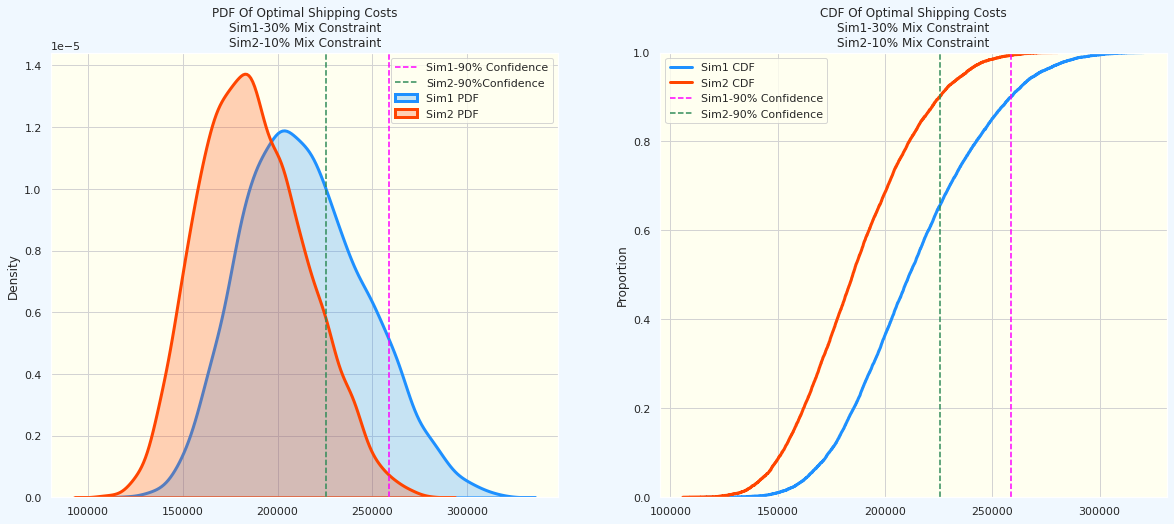

In [ ]:
# Create Figure and Set Up Elements
fig = plt.figure(figsize=(20,18))
sns.reset_orig()
sns.set(rc={'axes.facecolor':'ivory', 'figure.facecolor':'aliceblue'})

# Assign 2 Subplots to Figure
ax1 = fig.add_subplot(2, 2, 1)
ax3 = fig.add_subplot(2, 2, 2)

#Replot PDF for Simulation 1
sns.kdeplot(costs, ax=ax1, fill=True, lw=3, color='dodgerblue', label='Sim1 PDF')
#Add Plot For Simulation 2
sns.kdeplot(costs1, ax=ax1, fill=True, lw=3, color='orangered', label='Sim2 PDF')
#Set Title and Both 90% Confidence Intervals
ax1.set_title('PDF Of Optimal Shipping Costs\nSim1-30% Mix Constraint\nSim2-10% Mix Constraint')
ax1.axvline(np.quantile(costs, .9), linestyle='dashed', color='magenta', label='Sim1-90% Confidence')
ax1.axvline(np.quantile(costs1, .9), linestyle='dashed', color='seagreen', label='Sim2-90%Confidence')

#Replot CDF for Simulation 1
sns.ecdfplot(costs, ax=ax3, lw=3, color='dodgerblue', label='Sim1 CDF')
#Plot CDF For Simulation 2
sns.ecdfplot(costs1, ax=ax3, lw=3, color='orangered', label='Sim2 CDF')
#Add Title and 90% Confidence Levels
ax3.set_title('CDF Of Optimal Shipping Costs\nSim1-30% Mix Constraint\nSim2-10% Mix Constraint')
ax3.axvline(np.quantile(costs, .9), linestyle='dashed', color='magenta', label='Sim1-90% Confidence')
ax3.axvline(np.quantile(costs1, .9), linestyle='dashed', color='seagreen', label='Sim2-90% Confidence')

#Set GridLines and Add Legends
ax1.grid(color='lightgrey')
ax3.grid(color='lightgrey')
ax1.legend()
ax3.legend(loc='upper left')

#Display
plt.show()

**Indeed, lowering the supply-mix requirement from $30\%$ to $10\%$, will allow us to recommend lower shipping budgets!**

**Specifically:**

In [ ]:
#Store Difference in the Average Cost between Sim 1 and Sim 2. 
delta_avg = np.mean(costs) - np.mean(costs1)

#Display With Context
print("Given the parameters established in our uncertain demand scenario.\
  \nAverage optimal shipping costs from simulation 1 to\
  simulation 2 has been reduced by:\n\t " + "$" + str(round(delta_avg,2)))

Given the parameters established in our uncertain demand scenario.  
Average optimal shipping costs from simulation 1 to  simulation 2 has been reduced by:
	 $27015.89


**In addition to average optimal shipping costs, we find the distribution of values in simulation 2 to be less disperse. Specifically:**

In [ ]:
# Store Difference in the Average Cost between Sim 1 and Sim 2. 
std_sim1 = stdev(costs)
std_sim2 = stdev(costs1)
delta_std = std_sim1 - std_sim2

#Display With Context
print("Given the parameters established in our uncertain demand scenario.\
  \nStandard Deviation of optimal shipping costs was reduced from: \n\t" + str(round(std_sim1,3)) +\
  "-Simulation 1 To:\n\t" + str(round(std_sim2,3)) + "-Simulation 2\n\
The Standard Deviation of Simulation 2 has been reduced by:\n\t" + str(round(delta_std,2)))

Given the parameters established in our uncertain demand scenario.  
Standard Deviation of optimal shipping costs was reduced from: 
	32371.407-Simulation 1 To:
	27941.348-Simulation 2
The Standard Deviation of Simulation 2 has been reduced by:
	4430.06


**For simulation 2, we can conclude:**

In [ ]:
#Display 90% Empirical Confidence Level for Shipping Costs
print('We can tell the decision makers, that with 90% confidence:') 

print('\na shipping budget of $', round(np.quantile(costs1, .9),2), 'will be adequate to cover shipping costs for our 10 towns in Windham.')

#Display 90% Empirical Confidence Level for Vaccine Production
print('\na production of ', ceil(np.quantile(demand1, .9)), 'vaccines will be adequate to cover demand for our 10 towns in Windham.')

We can tell the decision makers, that with 90% confidence:

a shipping budget of $ 225496.12 will be adequate to cover shipping costs for our 10 towns in Windham.

a production of  4415.0 vaccines will be adequate to cover demand for our 10 towns in Windham.


**As we hypothesized we see a major improvement over the results from simulation 1. Specifically:**

In [ ]:
#Print Optimized Difference In Recommended Shipping Costs at the 90% Confidence level:
print('At the 90% Confidence Level, the difference in shipping costs between\
 simulation 2 and simulation 1 is: $', round(np.quantile(costs, .9) - np.quantile(costs1, .9)))

At the 90% Confidence Level, the difference in shipping costs between simulation 2 and simulation 1 is: $ 33173.0


**Let's see what accounts for this difference by rerunning the static model.** 

In [ ]:
#Recreate Baseline Model with Sim2 Constraints
model = ConcreteModel()

# Alias Hospitals and Towns
hosp = hospitals
town = town_list

#Declare Decision Variables
model.qvac = Var(arcs, domain=NonNegativeReals)

#Objective Function - 1.99 * Quantity of Vaccines + Activation Variable * Shipping Cost
model.Cost = Objective(
    expr = sum(([model.qvac[t, h]* cost_dict[t, h] for t in town for h in hosp])),
    sense = minimize)

#3 Types of Constraints
model.src = ConstraintList()
model.dmd = ConstraintList()
model.act = ConstraintList()

#Empty List For Mix Constraint - Yes, Expression 4. Where is expression 1, 2, & 3!? Dont ask. 
expr4 = []

#Source Constraints - Add To Expression 4 For Mix Constraint. And Ensure
# We not exceed 10M vaccines from any given hospital
for h in hosp:
  add_expr4=0
  add_expr4 += sum([model.qvac[t,h] for t in town])
  model.src.add(add_expr4 <= supply_dict[h])
  expr4.append(add_expr4)

#Add Mix Constraints (Reduced Constraints) - Each Hospital Assumes the Role As Hospital 1. 
model.src.add(expr = .9 * expr4[0] - .1 * expr4[1] - .1 * expr4[2] >= 0)
model.src.add(expr = .9 * expr4[1] - .1 * expr4[0] - .1 * expr4[2] >= 0)
model.src.add(expr = .9 * expr4[2] - .1 * expr4[1] - .1 * expr4[0] >= 0)

#Demand Constraints - Ensure The Sum of Vaccines To Each Town From All 3 Hospitals
# Is equal to the demand for that Town. 
for t in town:
    model.dmd.add(sum([model.qvac[t,h] for h in hosp]) == demand_dict[t])

#Solve and Print
results = SolverFactory('cbc').solve(model)
results.write()
model.pprint()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 70105.96
  Upper bound: 70105.96
  Number of objectives: 1
  Number of constraints: 17
  Number of variables: 31
  Number of nonzeros: 30
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of cr

In [ ]:
# Display Model Results
if 'ok' == str(results.Solver.status):
    #Display Information
    total_vaccines = sum([model.qvac[t,h]() for t in town for h in hosp])
    print("Total Shipping Costs = ",round(model.Cost(),2))
    print("Total Number Of Vaccines Delivered = ", total_vaccines)
    print("\nShipping Table:")
    for h in hosp:
      print('*'*100)
      ship_cost = 0
      vaccines = 0
      for t in town:
        if model.qvac[t,h]() > 0:
          print("Ship from ", h," to ", t, ":", model.qvac[t,h]())
          #Calculate Total Vaccines And Total Cost for each hospital
          ship_cost += model.qvac[t,h] * cost_dict[t,h]
          vaccines += model.qvac[t,h]()
      print('\t\tBudget To Ship From', h, '$', round(ship_cost(),2))
      print('\t\tTotal Vaccines Shipped From', h, ':', round(vaccines,2))
      print('\t\tPercentage of Vaccines Delivered from', h, ':',  round((vaccines/total_vaccines) * 100), '%')
else:
    print("No Valid Solution Found")

Total Shipping Costs =  70105.96
Total Number Of Vaccines Delivered =  1352.0

Shipping Table:
****************************************************************************************************
Ship from  Yale, New Haven Hospital  to  Windham : 135.2
		Budget To Ship From Yale, New Haven Hospital $ 10586.16
		Total Vaccines Shipped From Yale, New Haven Hospital : 135.2
		Percentage of Vaccines Delivered from Yale, New Haven Hospital : 10.0 %
****************************************************************************************************
Ship from  Hartford Hospital  to  Thompson : 65.0
Ship from  Hartford Hospital  to  Pomfret : 30.0
Ship from  Hartford Hospital  to  Ashford : 31.0
Ship from  Hartford Hospital  to  Eastford : 15.0
		Budget To Ship From Hartford Hospital $ 8539.41
		Total Vaccines Shipped From Hartford Hospital : 141.0
		Percentage of Vaccines Delivered from Hartford Hospital : 10.0 %
********************************************************************************

* $\$70105.96$ is $\$10146.82$ less than the original baseline model with the $30\%$ mix requirements constraints. 

* We see that Groton handles $80\%$ of the total vaccines while Hartford and Yale are at the lower bound of $10\%$

* These characterstics explain the cost savings we are able to achieve in our second simulation. 

# **Conclusion**

- As our analysis indicates Groton is clearly the most interesting hospital to our model for both simulation 1 and simulation 2. 

- We have saved quite a bit in shipping costs (aproximately $\$30,000$ from simulation 1 to simulation 2 by relaxing the supply-mix constraint. 

- We would recommend approximately $\$227,500$ as a shipping budget with a $10\%$ mix-constraint, based on our estimates. 

- Our recommendation to decision makers is to plan production and shipping based on a 90% empirical confidence level. The distribution itself is based on some assumptions which require further analysis and tracking. Specifically: 
  - The distribution of demand was generated using a triangular distribution. The triangular distribution is appropriate for situations characterized by uncertainty. As vaccine distribution begins, demand numbers will need to be tracked, so more accurate projections can be achieved. 

  - Demand was also estimated based on current cases. It is logical that towns where there are more cases of COVID, would have a higher demand than towns that do not. However, this is certainly not necessary. Again, numbers will need to be tracked to achieve better estimates for demand. 

  - Finally, the model assumes that when hospitals distribute to each of the towns, that before supplying the next town, delivery trucks must make a return trip to the hospital. In practice, a hospital might deliver to several towns on one trip. We could imagine adjusting the model to limit trucking cacacity for each trip, but allowing multiple deliveries on a single trip. 
     
     - Windham County is the perfect illustration of this phenomenon. Windham is characterized by low population density and towns with low demand, relative to some of the larger towns in CT. A single delivery might be able to supply multiple towns and produce better results in our model. 

- Relaxed constraints equate to better optimal values. 
  - There were a total of 16 constraints in our model
    - **Supply Constraint** - 3 Total. 1 For Each hospital. In reality this constraint was relaxed as could be, insofar as it was a nonfactor. In practice, we can clearly imagine how this constraint might play a much larger factor in the distribution problem. 
    - **Supply-Mix Constraints** - 3 Total. 1 For each hospital. Our two simulations proved that a reduction in the Supply-Mix Constraint from $30\%$ to $10\%$ would mean a reduced recommended shipping budget. It follows that a further reduced supply-mix Constraint, or an elimination of the constraint altogether would likely achieve even lower numbers. 
    - **Demand Constraints** - 10 Total. 1 For each town. Based on problem conception, our demand was tied directly to total cases as discussed above. Clearly, reducing the total demand required in each town would mean better optimal values. We cannot simply eliminate a demand requirement, however, we might be able to get better at predicting uncertain demand.   


# **Optional**

Just added commentary that our orignal formulation of the problem was incorrect. We took the problem description (1km = $\$1$) quite literally. Original understanding was we add a cost per vaccine, which we simply assumed at a ($\$1.99$)to ship and then add a cost in kilometer of $\$1$ per kilometer traveled. It seems silly in retrospect... 

We did spend some time formulating the problem using activation variables so we wanted to include this as an optional section.  

## **Decision Variables**

There are two sets of variables which our model will need to calculate. 

* $aroute$ - A Binary Activation Variable. Stands for `Active Route`. For each arc in the set of arcs, do we ship vaccines from this path $1$ or not $0$?

* $qvac$ - A NonNegative Real Number. Stands for `Quantity of Vaccines`. For each arc in the set of arcs, how many vaccines do we ship on that route?

There are 30 of each type of decision variables (one for each arc), for a total of 60 decision variables. 

## **Objective Function**

Our objective is to minimize the cost of distributing vaccines while covering the demand for our 10 towns. 

The cost of shipping is determined by, both the quantity of vaccines shipped, as well as the distance to deliver those vaccines from hospital to town. 

We will assume the additional cost to deliver 1 additional vaccine on any given shipment to be $\$1.99$

The objective function is given by:

$min \sum\limits_{a \in A} qvac_a * \$1.99 + aroute_a * shipcost_a$

Where a in an arc in the set of all arcs A. The activation variable is required here, because we do not want to calculate all 30 shipping costs, only the arcs that are active in the model. 

## **Constraints**

We will assume 3 sets of Constraints in our model:

1. **Source Constraints** - Includes two subsets.  
  
  a. **Supply Constraint** - No hospital can supply more than 10M vaccines. As discussed above, this constraint is essentially a placeholder. 
  
    * **There are a total of 3 Supply Constraints - 1 for each hospital**
  
  b. **Supply Mix Constraint** - All hospitals must supply at least $30\%$ of the total vaccines delivered. Mathematically we can express this in three equations where each hosptial assumes the **h1** position: 
    - $ 0.7 * qvac_{h1} - 0.3 * qvac_{h2} - 0.3 * qvac_{h3} \geq 0$

    * **There are a toal of 3 Supply Mix Contraints - One for each hospital.** 

    * **This means there are 6 Source Constraints.** 

2. **Demand Constraints** - We must ensure that every town has its demand met. 
  - $\sum\limits_{h \in Hospitals} qvac[t, h] = Demand[town]$

    * **There are a total of 10 demand constraints, one for each town.** 

3. **Activation Constraints** - To bind the activation variables we must ensure:
  - $\sum\limits_{a \in A} qvac_a \leq aroute_a \cdot demand[town] $

  This one was a bit tricky. But we know that the quantity of vaccines to any given town is going to be exactly equal to the demand of that town when we add shipments from all three hospitals. If an arc is chosen, this constraint will switch the Binary $aroute$ variable to the on position, assuming the value of $1$. 

    * **There are a total of 30 activation constraints, one for each arc, or route**

    * **In sum, there are 46 constraints in our model**

**With preliminary setup out of the way. Let's Model!**


In [ ]:
#Declare Model Instance
model = ConcreteModel()

# Alias Hospitals and Towns
hosp = hospitals
town = town_list

#Declare Decision Variables
model.aroute = Var(arcs, domain=Binary)
model.qvac = Var(arcs, domain=NonNegativeReals)

#Objective Function - 1.99 * Quantity of Vaccines + Activation Variable * Shipping Cost
model.Cost = Objective(
    expr = sum(([(1.99 * model.qvac[t, h])  + (model.aroute[t,h] * cost_dict[t, h]) for t in town for h in hosp])),
    sense = minimize)

#3 Types of Constraints
model.src = ConstraintList()
model.dmd = ConstraintList()
model.act = ConstraintList()

#Empty List For Mix Constraint - Yes, Expression 4. Where is expression 1, 2, & 3!? Dont ask. 
expr4 = []

#Source Constraints - Add To Expression 4 For Mix Constraint. And Ensure
# We not exceed 10M vaccines from any given hospital
for h in hosp:
  add_expr4=0
  add_expr4 += sum([model.qvac[t,h] for t in town])
  model.src.add(add_expr4 <= supply_dict[h])
  expr4.append(add_expr4)

#Add Mix Constraints - Each Hospital Assumes the Role As Hospital 1. 
model.src.add(expr = .7 * expr4[0] - .3 * expr4[1] - .3 * expr4[2] >= 0)
model.src.add(expr = .7 * expr4[1] - .3 * expr4[0] - .3 * expr4[2] >= 0)
model.src.add(expr = .7 * expr4[2] - .3 * expr4[1] - .3 * expr4[0] >= 0)

#Demand Constraints - Ensure The Sum of Vaccines To Each Town From All 3 Hospitals
# Is equal to the demand for that Town. 
for t in town:
    model.dmd.add(sum([model.qvac[t,h] for h in hosp]) == demand_dict[t])

#Activation Constraint. Switch the binary Variable to the On Position, if 
#The Quantity of Vaccines Shipped on that Route is Greater than 0.   
for arc in arcs:
  t, h = arc[0], arc[1]
  model.act.add(model.qvac[arc] <= model.aroute[arc]*demand_dict[t])

#Solve and Print
results = SolverFactory('cbc').solve(model)
results.write()
model.pprint()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 3301.67
  Upper bound: 3301.67
  Number of objectives: 1
  Number of constraints: 46
  Number of variables: 60
  Number of binary variables: 30
  Number of integer variables: 30
  Number of nonzeros: 60
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.03
  Wallclock time: 0.04
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and b

In [ ]:
# Display Model Results
if 'ok' == str(results.Solver.status):
    #Display Information
    print("Total Shipping Costs = ",round(model.Cost(),2))
    print("\nShipping Table:")
    for h in hosp:
      print('*'*100)
      ship_cost = 0
      vaccines = 0
      for t in town:
        if model.qvac[t,h]() > 0 or model.aroute[t,h]() > 0:
          print("Ship from ", h," to ", t, ":", model.qvac[t,h]())
          #Calculate Total Vaccines And Total Cost for each hospital
          ship_cost += 1.99 * model.qvac[t,h]() +(model.aroute[t,h]() * cost_dict[t,h])
          vaccines += model.qvac[t,h]()
      print('\t\tBudget To Ship From', h, '$', round(ship_cost,2))
      print('\t\tTotal Vaccines Shipped From', h, ':', round(vaccines,2))
else:
    print("No Valid Solution Found")

Total Shipping Costs =  3301.67

Shipping Table:
****************************************************************************************************
Ship from  Yale, New Haven Hospital  to  Windham : 427.4
		Budget To Ship From Yale, New Haven Hospital $ 928.83
		Total Vaccines Shipped From Yale, New Haven Hospital : 427.4
****************************************************************************************************
Ship from  Hartford Hospital  to  Putnam : 64.0
Ship from  Hartford Hospital  to  Thompson : 65.0
Ship from  Hartford Hospital  to  Pomfret : 30.0
Ship from  Hartford Hospital  to  Ashford : 31.0
Ship from  Hartford Hospital  to  Eastford : 15.0
Ship from  Hartford Hospital  to  Windham : 200.6
		Budget To Ship From Hartford Hospital $ 1144.44
		Total Vaccines Shipped From Hartford Hospital : 405.6
****************************************************************************************************
Ship from  Groton/L&M Hospital  to  Killingly : 127.0
Ship from  Groto

As you can see - this changed our optimal solution quite dramatically!

|name|netid|participation_score|
|---|---|---|
Sasanka Sekhar Reddy Pala|SSR19005|10
Vaddi Naga Lakshmi Sharma|VNL19001|10
Jeremy Banas|JAB02006|10
Joseph Sklenar|JMS05018|10

Everyone contributed to all phases of the project.